# Phase 3 Project : Analysis of Customer Churn at SyriaTel

Author:Elsie Lovell Kiprop

## Business Understanding
Being a telecommunications company, retaining customers is very important for SyriaTel to make profits.SyriaTel is interested in reducing the losses that arise due to customers quitting using their services after a given time.

Therefore, this project will aim to investigate customer churn which simply means the percentage at which the customers stop using a company over a specific period of time. This will help SyriaTel,who is our stakeholder to cut down the losses made when some customers quit using their services. It will also be important in finding the factors that greatly influence customer churn.

## Data Understanding
The data used was sourced from Kaggle(https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset). Its called ```bigml_59c28831336c6604c800002a.csv```.
The dataset contains the following columns:
* state
* account length
* area code
* phone number
* international plan
* voice mail plan
* number vmail messages
* total day minutes 
* total day calls
* total day charge
* total eve minutes
* total eve calls
* total eve charge
* total night minutes
* total night calls
* total night charge
* total intl minutes
* total intl call
* total intl charge
* customer service calls
* churn

The target variable in this case is ```churn``` where false(0) represents a customer not quiting SyriaTel's services while true(1) represents a customer quiting the services.

### Importing the Dataset


In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
#Importing the data
syriatel = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
syriatel.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Data Cleaning
In this section we check for missing values and duplicates.

In [3]:
#checking for missing values
syriatel.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in the data.

In [4]:
#Checking for duplicates
syriatel.duplicated().sum()

0

There are no duplicates either.

### Dropping columns not required
We will drop ```state```, ```area code``` and ```phone number```

In [5]:
data = syriatel.drop(['phone number' , 'state', 'area code'], axis=1)
data

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


### Changing categorical column values to binary values
We will change the categorical colums into binary values. These columns include:
 * ```'international plan'```: 'yes' will be replaced with one and 'no' with 0
 * ```'voice mail plan'``` : 'yes' will be replaced with one and 'no' with 0
 * ```'churn'```: 'True' will be replaced with 1 and 'False' with 0
 


In [6]:

data["international plan"] = data["international plan"].map({"yes": 1, "no": 0})
data["voice mail plan"] = data["voice mail plan"].map({"yes": 1, "no": 0})
data["churn"] = data["churn"].map({True: 1, False: 0})
data.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [81]:
#Checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int64  
 2   voice mail plan         3333 non-null   int64  
 3   total day calls         3333 non-null   int64  
 4   total day charge        3333 non-null   float64
 5   total eve calls         3333 non-null   int64  
 6   total eve charge        3333 non-null   float64
 7   total night calls       3333 non-null   int64  
 8   total night charge      3333 non-null   float64
 9   total intl calls        3333 non-null   int64  
 10  total intl charge       3333 non-null   float64
 11  customer service calls  3333 non-null   int64  
 12  churn                   3333 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 338.6 KB


## Exploratory Data Analysis

### Descriptive statistics
Here we will be able to see various statistical measures of our features such as the mean, standard deviation, maximum and minimum values and the percentiles.


In [8]:
# Calculating various statistical measures of our data
data.describe()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


### Checking for multicollinearity
We will plot a correlation heat map to check for multicollinearity between the variables

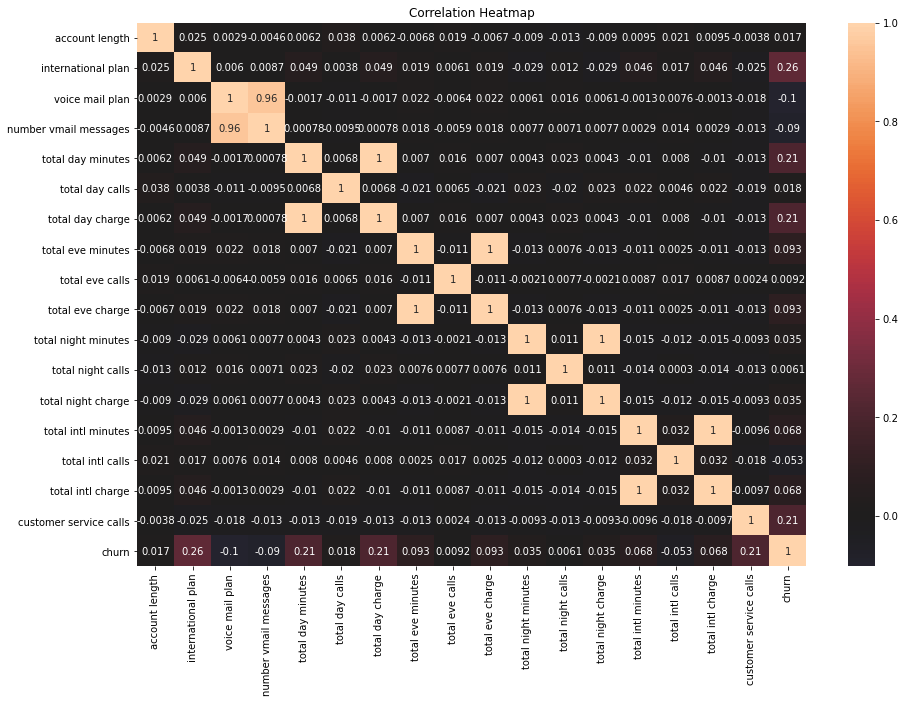

In [9]:
#Plotting correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize = (15,10))
sns.heatmap(correlation_matrix, center = 0, annot = True)
plt.title('Correlation Heatmap')
plt.show()

From the multicollinearity heatmap, we can see that the following features are correlated with each other:
* ```total intl charge``` and ```total intl minutes``` 
* ```total night charge``` and ```total night minutes```
* ```total eve charge``` and ```total eve minutes```
* ```total day charge``` and ```total day minutes```
* ```number of vmail messages``` and ```voice mail plan```

This just shows the longer the minutes taken on a call, the higher the charge. It also means tht the higher the number of voice mails the higher the chances that a customer has a voice mail plan.
 

In [10]:
#Dropping some columns to adress multicollinearity.
data= data.drop(['total intl minutes','total night minutes', 'number vmail messages','total eve minutes', 'total day minutes'], axis=1)
data.head()

,account length,international plan,voice mail plan,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,107,0,1,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,137,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,84,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,75,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


### Investigating ```churn``` column

C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


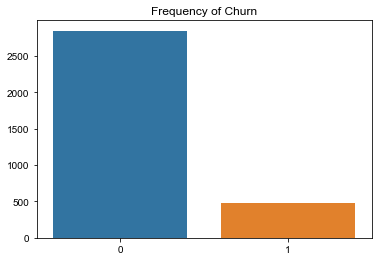

In [11]:
#Creating a bar graph
churn = data['churn'].value_counts()
sns.barplot(churn.index, churn.values)
plt.title('Frequency of Churn')
plt.style.use('seaborn')
plt.show()

We can see that the number of customers who churn is lower than the number of customers who continue using the services.

### Investigating the ```'voice mail plan'``` column

C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


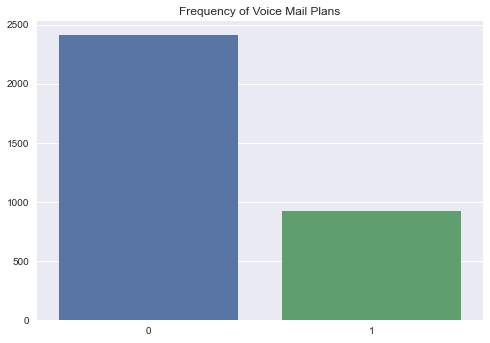

In [12]:
voice_mail_plan = data['voice mail plan'].value_counts()
sns.barplot(voice_mail_plan.index, voice_mail_plan.values)
plt.title('Frequency of Voice Mail Plans')
plt.style.use('seaborn')
plt.show()

Most of the customers do not have a voice mail plan.

### Customer Service Calls Vs Churn

Text(0, 0.5, 'Call Count')

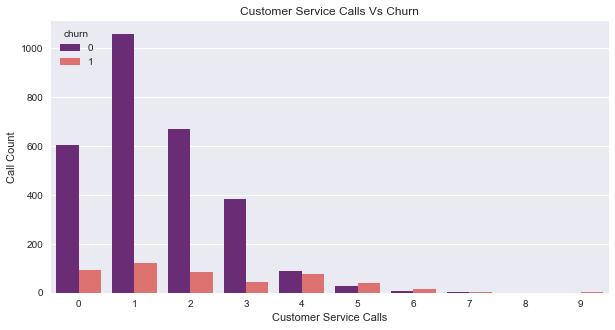

In [86]:
fig, ax = plt.subplots(figsize=(10,5))

ax= sns.countplot(x='customer service calls', data=data, hue='churn', palette='magma' )
ax.set_title('Customer Service Calls Vs Churn')
ax.set_xlabel('Customer Service Calls')
ax.set_ylabel('Call Count')

Majority of the customers receive one customer service calls and most of them do not churn. Among those who churn, majority received 1 customer service call.

### Account Length Vs Churn
In this case we will convert the account length from days to months 

Text(0, 0.5, 'Length count')

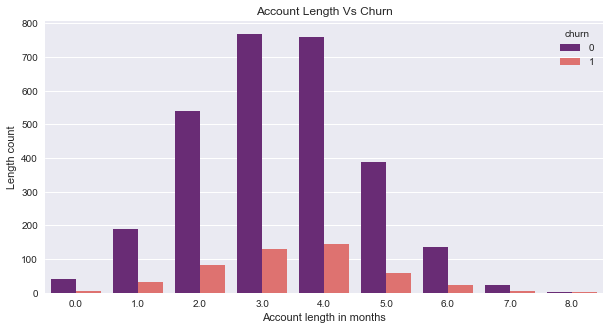

In [87]:
account_length_by_month = round(data['account length']/30)
fig, ax = plt.subplots(figsize=(10,5))

ax= sns.countplot(x=account_length_by_month, data=data, hue='churn', palette='magma', )
ax.set_title('Account Length Vs Churn')
ax.set_xlabel('Account length in months')
ax.set_ylabel('Length count')

Majority of the customers who churn , do so between 3 to 4 months. Majority of the accounts are also held for 3 to 4 months.Most of those who have had their accounts for this period of time do not churn. 

#### International plan Visualization

Text(0, 0.5, 'Count')

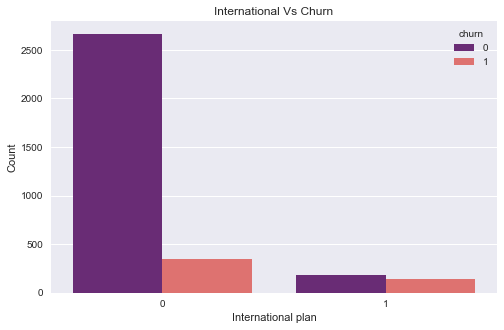

In [76]:
international_plan = data['international plan']
fig, ax = plt.subplots(figsize=(8,5))

ax= sns.countplot(x=international_plan, data=data, hue='churn', palette='magma', )
ax.set_title('International Vs Churn')
ax.set_xlabel('International plan')
ax.set_ylabel('Count')

Majority of the customers do not have the international plan. Among those who have it, the churning rate is high.


## Data Preprocessing.

In [16]:
#Importing the necessary packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
#Defining X and y
X= data.drop(columns=['churn'],axis=1)
y= data['churn']

In [18]:
X.head()

,account length,international plan,voice mail plan,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
0,128,0,1,110,45.07,99,16.78,91,11.01,3,2.70,1
1,107,0,1,123,27.47,103,16.62,103,11.45,3,3.70,1
2,137,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0
3,84,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2
4,75,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [20]:
#Train Test Split
#We will use a test size of 25% and random_state of 42 for reproducibility
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## Modelling
In this section we will create a number of models and evaluate how each of them performs using various classification metrics.
We will eventually choose the best model as our final model.

#### Choice of Metrics
The classification metrics that will be used to evaluate our models are as follows:
* Accuracy : This will show what percentage by which the predictions made on the customers churning are correct
* Precision: This helps answer the question, 'Out of all the times a customer was said to have churned,how many times did the customer actually churn?'
* Recall: This helps us answer the question, 'By what percentage does our model correctly identify the churned customers?'
* F1: This represents the harmonic mean of te precision and recall.
* AUC : This represents the area under the ROC curve. The larger the better meaning a higher true positive rate for a given false positive rate.

In [21]:
#Importing the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

### Baseline Model

For our base model, we will fit a logistic regresssion model and thereafter see how it performs as we create other subsequent models.

### Logistic Regression
The first model we will create is the Logistic regression.
To check for the performance of the model, we will plot an ROC-AUC curve. The curve is a plot of True Positive Rate and the False Positive Rate. We will also create a confusion matrix.
Firstwe will run the regression model with the data as it is.

In [22]:
#Logistic Regression Model.
#Instantiating
base_model=LogisticRegression()
#fitting the model
base_model.fit(X_train,y_train)

LogisticRegression()

In [23]:
#Accuracy, precision,recall and f1-score.
y_pred=base_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))
print('F1 Score:', f1_score(y_test,y_pred))
print('Precision:', precision_score(y_test,y_pred))

Accuracy: 0.8525179856115108
Recall: 0.096
F1 Score: 0.163265306122449
Precision: 0.5454545454545454


In [24]:

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
AUC = auc(false_positive_rate, true_positive_rate)
AUC

0.540947813822285

<Figure size 720x360 with 0 Axes>

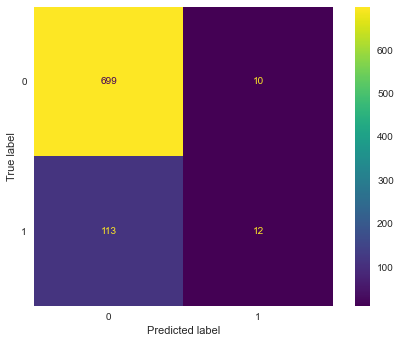

In [25]:
#Plotting a confusion matrix
plt.figure(figsize=(10,5))
plot_confusion_matrix(base_model,X_test,y_test)
plt.grid(False)

From the above analysis of the logistic regression, we can see that the model is 85% accurate which is good. However the f1 score and the recall score are too low. It is also evident that there is a high number of false positives(Those who were said to churn but did not actually churn) at 113. The AUC score is at 54% which is somehow low. However this model has the potential to do better

In [26]:
#Checking for imbalance.
y_test.value_counts(normalize=True)

0    0.85012
1    0.14988
Name: churn, dtype: float64

There is an imbalance since majority(85%) of the values belong in the 0 category which represents those customers who do not churn. Those who churn represent about 15% of the total customers. To make the model better we will scale it and also use SMOTE to deal with the imbalance.

### Scaling
Scaling will be done using sklearn's StandardScaler.

In [27]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled= ss.transform(X_test)

### Resampling
To deal with the imbalance issue, we will use ```SMOTE``` for resampling

In [28]:
smote = SMOTE(random_state=42,sampling_strategy=0.28)
X_train_sm,y_train_sm=smote.fit_resample(X_train_scaled,y_train)


Having scaled and resampled, we can no go ahead and fit a logistic regression model to see how it will perform this time.
This second Logistic Regression model will have the following parameters:
* ```random_state = 42```
* ```fit_intercept = False```
* ```c = 1e15```
* ```solver = 'liblinear'```

### Logistic Regression after scaling and resampling


In [29]:
#Fitting the model
lr = LogisticRegression(random_state=42, fit_intercept = False, C = 1e15, solver = 'liblinear')
lr.fit(X_train_sm,y_train_sm)

LogisticRegression(C=1000000000000000.0, fit_intercept=False, random_state=42,
                   solver='liblinear')

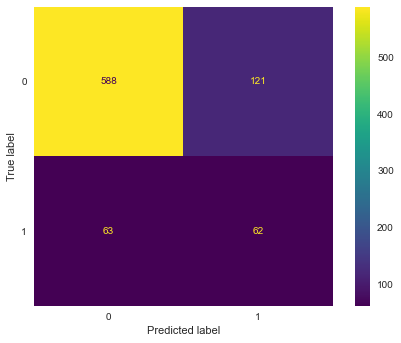

In [30]:
#Confusion matrix
plot_confusion_matrix(base_model,X_test_scaled,y_test,);
plt.grid(False)
#plt.show()

In [31]:
#Accuracy, precision,recall and f1-score.
y_hat=lr.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test,y_hat))
print('Recall:', recall_score(y_test,y_hat))
print('F1 Score:', f1_score(y_test,y_hat))
print('Precision:', precision_score(y_test,y_hat))

Accuracy: 0.6822541966426858
Recall: 0.888
F1 Score: 0.45585215605749485
Precision: 0.30662983425414364


From the above metrics, the accuracy(68%) of this model has gone lower after scaling and resampling. The f1 score at 46% and the precision score at 31% are definitely better. 

In [32]:
y_predicted = lr.predict(X_test_scaled)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predicted)
AUC = auc(false_positive_rate, true_positive_rate)
AUC

0.7669901269393512

The AUC is higher in this case at 76%. This is much better compared to the first model.
We will go ahead and try other different models so as to get the best and final model.

## Decision Tree Model 
In this section we will create decision trees and tune the hyperparameters and evaluate their performance. We will fit the models on already scaled and resampled data. 

In [33]:
#Base decision tree
tree_1 = DecisionTreeClassifier(random_state=1,criterion='entropy')
tree_1.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [34]:
# Make predictions using test set 
y_predicted = tree_1.predict(X_test_scaled)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
AUC = auc(false_positive_rate, true_positive_rate)
AUC

0.540947813822285

The AUC in this case is lower than the earlier models.

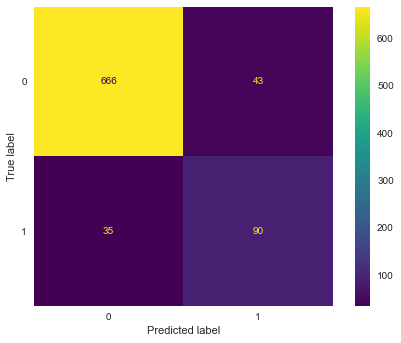

In [35]:
#Confusion matrix
plot_confusion_matrix(tree_1,X_test_scaled,y_test);
plt.grid(False)

In [36]:
#Calculating classification metrics.


print('Accuracy:', accuracy_score(y_test,y_predicted))
print('Recall:', recall_score(y_test,y_predicted))
print('F1 Score:', f1_score(y_test,y_predicted))
print('Precision:', precision_score(y_test,y_predicted))

Accuracy: 0.9064748201438849
Recall: 0.72
F1 Score: 0.6976744186046512
Precision: 0.6766917293233082


The accuracy (91%) of the decision tree has improved compared to the previous models. Recall, F1 Score and precision are also better than the models we had earlier.
We will go ahead and do hyperparameter tuning and see whether we will have better performance than this.

### Hyperparameter tuning in Decision Trees
In this section we will do some hyperparameter tuning to see what effect it has on the performance of our decision tree and to check whether it will improve the performance.

In [37]:
#Using GridSearchCV
par={
    'max_depth':[2,4,5,10],
    'min_samples_leaf': [5,15,20,50],
    'criterion':['gini','entropy']
}

In [38]:
#Instantiating the grid search
D_tree=DecisionTreeClassifier()
g_search= GridSearchCV(estimator=D_tree,
                      param_grid=par,
                      scoring= 'accuracy',cv=5)

In [39]:
#Fitting grid search
g_search.fit(X_train_sm,y_train_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 10],
                         'min_samples_leaf': [5, 15, 20, 50]},
             scoring='accuracy')

In [40]:
tree_2=g_search.best_estimator_
tree_2

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=15)

In [41]:
#Calculating classification metrics
y_p=tree_2.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test,y_p))
print('Recall:', recall_score(y_test,y_p))
print('F1 Score:', f1_score(y_test,y_p))
print('Precision:', precision_score(y_test,y_p))

Accuracy: 0.934052757793765
Recall: 0.72
F1 Score: 0.7659574468085107
Precision: 0.8181818181818182


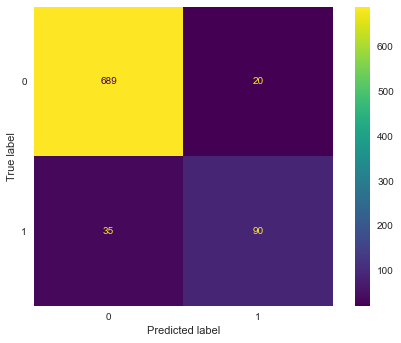

In [42]:
#Confusion matrix
plot_confusion_matrix(tree_2,X_test_scaled,y_test);
plt.grid(False)


In [43]:
#Calculating AUC.

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_p)
AUC = auc(false_positive_rate, true_positive_rate)
AUC


0.8458956276445699

After tuning the decision tree, we can see that there is better performance.The accuracy (93%) of this model is higher than the earlier ones. Recall,precision and f1 scores are also showing better performance compared to the earlier models. This ia also the same case with the AUC at 84%. The model performs very well generally. We will go ahead and try different models to see whether theres any other that out performs this one.

## Random Forest

We will create random forest models and evaluate their performance. We will use gridsearchCV for tuning and finding the model with the best hyperparameters. 

### Base Random Forest


In [44]:
base_rf=RandomForestClassifier(random_state=42)
base_rf.fit(X_train_sm,y_train_sm)

RandomForestClassifier(random_state=42)

In [45]:
y_predict = base_rf.predict(X_test_scaled)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
AUC = auc(false_positive_rate, true_positive_rate)
AUC

0.853179125528914

In [46]:
#Calculating classification metrics

print('Accuracy:', accuracy_score(y_test,y_predict))
print('Recall:', recall_score(y_test,y_predict))
print('F1 Score:', f1_score(y_test,y_predict))
print('Precision:', precision_score(y_test,y_predict))

Accuracy: 0.9520383693045563
Recall: 0.712
F1 Score: 0.81651376146789
Precision: 0.956989247311828


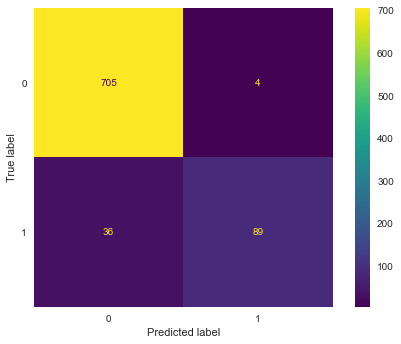

In [72]:
plot_confusion_matrix(base_rf,X_test_scaled,y_test);
plt.grid(False)

The model above has a really good performance. Its accuracy is at 95% which is really good. The AUC is also very decent at 85%. 
F1 score (82%), precision(97%) and recall (71%) show that the model is doing so well.

#### Hyperparameter tuning in Random Forest

In [48]:
#Defining hyperparameters
estimators=[int(x) for x in np.linspace(start=10,stop=50,num=15)]

parameters={
           'n_estimators': estimators,
           'criterion': ['gini','entropy','log_loss'],
           'max_features': ['sqrt','auto', 'log2'],
           'max_depth': [2,5],
           'min_samples_leaf': [5,15],
           
           'class_weight':['balanced'],
           'random_state': [42]
    
    
}




In [49]:
#Fitting the model.
r_forest=RandomForestClassifier()

gs_cv= GridSearchCV(estimator=r_forest,
                      param_grid=parameters,
                      scoring= 'accuracy')

In [50]:
gs_cv.fit(X_train_sm,y_train_sm)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 5],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'min_samples_leaf': [5, 15],
                         'n_estimators': [10, 12, 15, 18, 21, 24, 27, 30, 32,
                                          35, 38, 41, 44, 47, 50],
                         'random_state': [42]},
             scoring='accuracy')

In [51]:
#Finding the best estimators.
rf=gs_cv.best_estimator_
rf

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       max_features='sqrt', min_samples_leaf=5, n_estimators=21,
                       random_state=42)

In [52]:
#Calculating classification metrics
y_p=rf.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test,y_p))
print('Recall:', recall_score(y_test,y_p))
print('F1 Score:', f1_score(y_test,y_p))
print('Precision:', precision_score(y_test,y_p))

Accuracy: 0.9052757793764988
Recall: 0.792
F1 Score: 0.7148014440433212
Precision: 0.6513157894736842


In [53]:
#Calculating AUC
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_p)
AUC = auc(false_positive_rate, true_positive_rate)
AUC

0.85862341325811

From the results above we can see that the accuracy of our random forest model is goot at 91%.
the other scores also show that the model is doing quite well. The AUC also shows good performance at 86%.
Having these we will proceed to create a K Nearest Neighbours model and evaluate its performance then we will pick our best model.

### K Nearest Neighbor (KNN)

#### Base KNN model
We will first create a base knn model before tuning the hyperparameters.

In [54]:
#Instantiating and fitting the model
base_knn=KNeighborsClassifier()
base_knn.fit(X_train_sm,y_train_sm)

KNeighborsClassifier()

In [55]:
#Calculating AUC
y_hat_test= base_knn.predict(X_test_scaled)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_test)
AUC = auc(false_positive_rate, true_positive_rate)
AUC


0.7536755994358252

In [56]:
#Accuracy, Recall, F1 and Precision scores.

print('Accuracy:', accuracy_score(y_test,y_hat_test))
print('Recall:', recall_score(y_test,y_hat_test))
print('F1 Score:', f1_score(y_test,y_hat_test))
print('Precision:', precision_score(y_test,y_hat_test))

Accuracy: 0.8836930455635491
Recall: 0.568
F1 Score: 0.5941422594142259
Precision: 0.6228070175438597


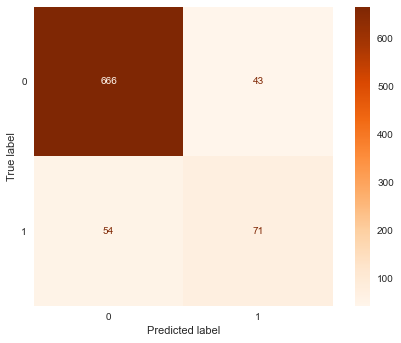

In [57]:
#Confusion matrix
plot_confusion_matrix(base_knn,X_test_scaled,y_test,cmap='Oranges');
plt.grid(False)

This model is also doin well but not as good as some that we have done earlier. It has an accuracy of 88%. Looking at the other metrics,we can see that some of the earlier models have out performed it.

### Tuned KNN
We will apply GridSearchCV in this case as well.

In [58]:
#Defining the parameters
params={
       'n_neighbors': np.arange(5,50,10),
       'weights': ['uniform','distance'],
       'algorithm': ['auto','ball_tree','kd_tree','brute'],
       'leaf_size':[50] 
    
}

In [88]:
#Instantiating knn
tuned_knn=KNeighborsClassifier()
gs= GridSearchCV(estimator=tuned_knn,
                      param_grid=params,
                      scoring= 'accuracy')

In [60]:
#Fitting
gs.fit(X_train_sm,y_train_sm)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [50],
                         'n_neighbors': array([ 5, 15, 25, 35, 45]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [61]:
#Finding the best estimators.
knn=gs.best_estimator_
knn

KNeighborsClassifier(leaf_size=50, weights='distance')

In [62]:
#Calculating classification metrics
y_pr=knn.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test,y_pr))
print('Recall:', recall_score(y_test,y_pr))
print('F1 Score:', f1_score(y_test,y_pr))
print('Precision:', precision_score(y_test,y_pr))

Accuracy: 0.882494004796163
Recall: 0.568
F1 Score: 0.5916666666666666
Precision: 0.6173913043478261


In [63]:
#Calculating AUC
y_pr= base_knn.predict(X_test_scaled)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pr)
AUC = auc(false_positive_rate, true_positive_rate)
AUC


0.7536755994358252

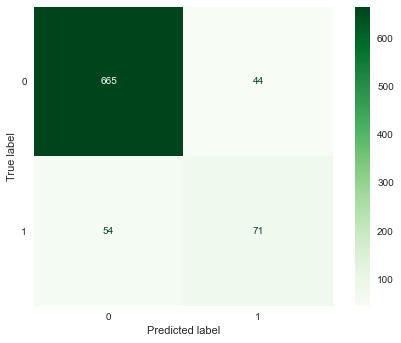

In [64]:
#Plotting the confusion matrix
plot_confusion_matrix(knn,X_test_scaled,y_test,cmap='Greens');
plt.grid(False)

Tuning the KNN does not have much of a difference on the accuracy as it is still at 88%. The results are not that different even after tuning.

## Final Model

Having explored the various models,we can now compare and find the best performing model.
Looking at the evaluation done, the best model is the base random forest model (```'base_rf'```) before the tuning.
The following are its metrics.
* Accuracy = 0.9520383693045563
* Recall = 0.712
* F1 score = 0.81651376146789
* Precision = 0.956989247311828
* AUC = 0.853179125528914

The predictions made by the model are 95% correct. Of all the times a customer was said to churn, 96% of the times the customer churned. The model also correctly identified the churned customers by 71%
Out of all the models that were created this one had the highest accuracy and precision score. The other metrics are also very good . Hence it was chosen as the final model

In [74]:
#Calculating the importances and putting them in a data frame
importance=pd.concat([pd.DataFrame(X_train.columns), pd.DataFrame(base_rf.feature_importances_)],axis = 1)

#Naming Columns of our feature importance dataframe
importance.columns=['Features','Importance']
#Sorting the importance values in ascending order
importance.sort_values(by='Importance',ascending=True, inplace=True)


Text(0.5, 0, 'Level of importance')

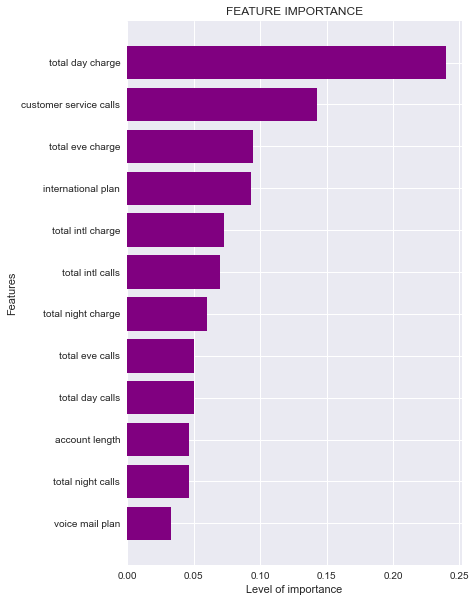

In [79]:
#Plotting the feature importance graph
fig=plt.figure(figsize=(6,10))
plt.barh(importance['Features'],importance['Importance'],color={'purple'})
plt.title('FEATURE IMPORTANCE')
plt.ylabel('Features')
plt.xlabel('Level of importance')

From the analysis of feature importance, the following are the top 5 features that influence churning:
* Total day charge
* Customer service calls
* Total eve charge
* International plan
* Total international charge


## Recommendations and conclusion.

After modelling , we founf that, random forest was the best model to use. In this case it was the random forest model before tuning was done. It had an accuracy value of 95% which was higher than all the other models that we had.

After investigating the feature importance above, it is evident that, the higher the total day charge the higher the number of churns.This also applies to total eve charge and and international charges.
The more a customer makes customer service calls to probably air a complaint, the higher the churn. This churn may be attributed to the fact that the customers do not get hepl they need after reaching out to the customer care.
Most customers do not have international plans, this may be contributed by the fact that international plans may be expensive.


The following are the recommendations that SyriaTel should put into consideration:
* They should reduce their charges as it is evident that the day, eve and international charges play a big role in churning of customers. The charges should be made more affordable. Furthermore, SyriaTel should consider offering clients who use their services more bonuses to encourage them to use their services.
* In regards to customer service calls, SyriaTel should look into the issues raised by their customers whenever they make this calls and devise appropriate ways to deal with them. It is evident from the EDA section that majority of the customers who churn, do so after one call. This may be due to the fact that their issues were not resolved. They should also come up with ways to ensure once a customer raises an issue, the issue gets resolved in a timely manner. 
* They should revise their international plan as it is clear that most customers end up churning. They could make the international plans more affordable. Another alternative is to do away with the international plans since most of the customers do not even have this plan. 

## Next Steps
After implementing the above recommendations, SyriaTel can go ahead to see whether they were effective by checking their level of customer retention. This should also include investigating whether these measures are cost effective.